### En este notebook se evidenci el proceso de entremamiento de los modelos de Machine Learning y la seleccion del modelo que mmejor se adapte a los datos.

### Correr las dos siguientes filas si es la primera vez en la que se va a definir los datos para el modelo

In [19]:
# Importamos la funcion que nos trae los datos para nuestro modelo
from ETL_TaxisTrips import EtlTaxisTrip

In [22]:
data= EtlTaxisTrip('../Datasets/','yellow_tripdata_2023-*.parquet')
data.to_csv('../MachineLearning/DataModel.csv', index= False)

### Correr desde aqui si los datos para el modelo ya estan definidos 

In [45]:
# Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
'''
El resultado de estos datos son explicados en el EDA y ETL,
revisar si se tiene una duda.
'''
data= pd.read_csv('../MachineLearning/DataModel.csv')
data

,trip_distance,fare_amount,trip_duration_minutes
0,2.64,21.9,23.9
1,1.30,11.0,17.6
2,2.63,18.4,17.4
3,2.15,14.2,12.3
4,2.97,19.8,20.3
...,...,...,...
421291,8.66,41.5,34.0
421292,2.50,16.3,20.1
421293,1.23,13.5,15.0
421294,6.10,28.9,21.9


#### Como se se trata de un problema de regresion, usaremos algoritmos de aprendizaje supervisado


#### De los primeros modelos que probaremos para este caso seran los modelos lineales avanzados loc cuales son Regresión Ridge y Lasso

In [6]:
# Importamos los modelos y las metricas para evaluar los modelos 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [7]:
# Separamo las features y el target

X = data[['trip_distance', 'trip_duration_minutes']]
y = data['fare_amount']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(105324, 2)
(315972, 2)
(105324,)
(315972,)


In [9]:
# Regresión Ridge

ridge = Ridge()  
ridge.fit(X_train, y_train)

Ridge()

In [10]:
# Predecimos con la regresion Ridge con los datos de entrenamiento para ver si hay sobreajuste o subajuste 
y_pred_train = ridge.predict(X_train)

#### Para evaluar un modelo en un problema de regresion exisen diversas metricas, las que emplearemos seran:

***Mean Squared Error (MSE)***: Mide el promedio de los cuadrados de los errores, es decir, las diferencias cuadradas entre los valores predichos por el modelo y los valores reales.

***Error absoluto medio (MAE)***: Calcula el promedio de las diferencias absolutas entre los valores predichos y los valores reales. Al igual que el MSE, un valor más bajo es mejor.

***Coeficiente de correlación (R²)***: Indica cuánto de la variación en la variable dependiente puede explicarse por el modelo. R² varía entre 0 y 1, donde 1 indica una predicción perfecta y 0 indica que el modelo no explica nada de la variabilidad de la variable dependiente.

In [11]:
# Definimos las varibles donde almacenaremos los resultados de las metricas 

mse= round(mean_squared_error(y_train, y_pred_train),3)
mae = round(mean_absolute_error(y_train, y_pred_train),3)
r2 = round(r2_score(y_train, y_pred_train),3) 

# Printeamos los resultados 

print(f'MSE: {mse}')
print(f"MAE: {mae}")
print(f"R²: {r2}")

MSE: 4.649
MAE: 1.005
R²: 0.962


In [12]:
# Predecimos con la regresion Ridge con los datos de test
y_pred_ridge = ridge.predict(X_test)

In [13]:
# Definimos las varibles donde almacenaremos los resultados de las metricas 

mse= round(mean_squared_error(y_test, y_pred_ridge),3)
mae = round(mean_absolute_error(y_test, y_pred_ridge),3)
r2 = round(r2_score(y_test, y_pred_ridge),3) 

# Printeamos los resultados 
print(f'MSE: {mse}')
print(f"MAE: {mae}")
print(f"R²: {r2}")

MSE: 4.513
MAE: 1.003
R²: 0.963


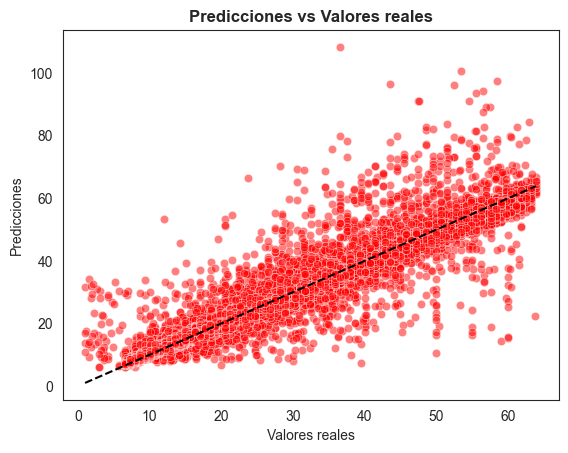

In [14]:
# Realizamos el grafico para comparar las predicciones 
sns.set_style("white")
sns.scatterplot(x=y_test, y= y_pred_ridge, color= 'red',alpha= 0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1.5)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores reales", fontweight="bold")
plt.grid(False)

plt.show()

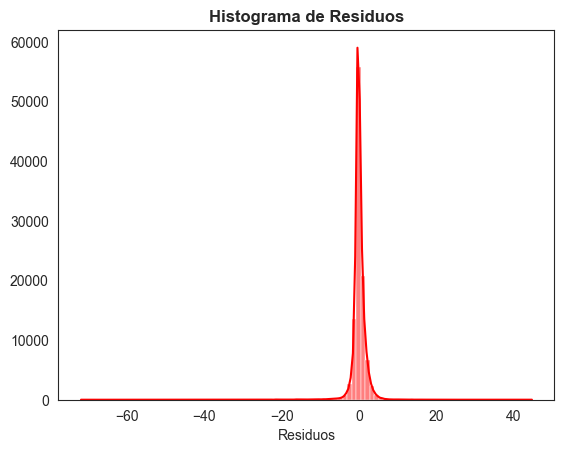

In [15]:
# Calculamos las errores 
residuos = y_test - y_pred_ridge

# Graficamos el histograma 
sns.set_style("white")
sns.histplot(residuos, bins=100, color= 'red', kde=True)
plt.xlabel("Residuos")
plt.ylabel("")
plt.title("Histograma de Residuos",fontweight="bold")
plt.show()

#### Ahora se realizara el procese con la regresion de Lasso

In [16]:
# Inicializamos  el modelo que es este caso es la regresion Lasso
lasso = Lasso()

In [17]:
# Entrenamos el modelo
lasso.fit(X_train,y_train)

Lasso()

In [18]:
# Predicciones con los datos de entremamiento para probar el sobre o subajauste 
y_lasso= lasso.predict(X_train)

In [19]:
# Definimos las varibles donde almacenaremos los resultados de las metricas 

mse= round(mean_squared_error(y_train, y_lasso),3)
mae = round(mean_absolute_error(y_train, y_lasso),3)
r2 = round(r2_score(y_train, y_lasso),3) 

# Printeamos los resultados 
print(f'MSE: {mse}')
print(f"MAE: {mae}")
print(f"R²: {r2}")

MSE: 4.813
MAE: 1.054
R²: 0.96


In [20]:
# Hacemos predicciones con los valores de test para calcular las nuevas metricas
y_lasso_predict= lasso.predict(X_test)

In [21]:
# Definimos las varibles donde almacenaremos los resultados de las metricas 

mse= round(mean_squared_error(y_test, y_lasso_predict),3)
mae = round(mean_absolute_error(y_test, y_lasso_predict),3)
r2 = round(r2_score(y_test, y_lasso_predict),3) 

# Printeamos los resultados 

print(f'MSE: {mse}')
print(f"MAE: {mae}")
print(f"R²: {r2}")

MSE: 4.679
MAE: 1.051
R²: 0.962


### Una vez fueron probados los modelos lineales avanzados, probaremos 2 modelso de esamble, loa cuales seran un arbol de decision y un bosque aleatorio, esto para poder comparar metricas y ver cual resulta mejor.

In [22]:
# Importamos los modelos
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#### Empezaremos usando un arbol de decesion 

In [23]:
# Inicializamos el modelo en est caso sera el arbol
tree= DecisionTreeRegressor()

In [24]:
# Entrenamos el modelo 
tree.fit(X_train,y_train)

DecisionTreeRegressor()

In [25]:
# Predicciones con los datos de entremamiento para probar el sobre o subajauste 
y_tree= tree.predict(X_train)

In [26]:
# Definimos las varibles donde almacenaremos los resultados de las metricas 

mse= round(mean_squared_error(y_train, y_tree),3)
mae = round(mean_absolute_error(y_train, y_tree),3)
r2 = round(r2_score(y_train, y_tree),3) 

# Printeamos los resultados 
print(f'MSE: {mse}')
print(f"MAE: {mae}")
print(f"R²: {r2}")

MSE: 0.856
MAE: 0.411
R²: 0.993


In [27]:
# Predicciones con los datos de testing
y_tree_predict= tree.predict(X_test)

In [28]:
# Definimos las varibles donde almacenaremos los resultados de las metricas 

mse= round(mean_squared_error(y_test, y_tree_predict),3)
mae = round(mean_absolute_error(y_test, y_tree_predict),3)
r2 = round(r2_score(y_test, y_tree_predict),3) 

# Printeamos los resultados 
print(f'MSE: {mse}')
print(f"MAE: {mae}")
print(f"R²: {r2}")

MSE: 5.674
MAE: 1.008
R²: 0.954


#### Los resultados indican que el modelo de árbol de decisión está sobreajustado. Esto significa que el modelo ha capturado muy bien las características y el ruido de los datos de entrenamiento, pero no generaliza tan bien a datos no vistos. Pero al igual con el conjunto de datos de test genera buenas metricas

#### Ahora emplearemos un bosque aleatorio 

In [29]:
# Inicializamos el modelo

radom= RandomForestRegressor()

In [30]:
# Entrenamos el modelo 
radom.fit(X_train,y_train)

RandomForestRegressor()

In [31]:
# Predicciones con los datos de entremamiento para probar el sobre o subajauste 
y_radom= radom.predict(X_train)

In [32]:
# Definimos las varibles donde almacenaremos los resultados de las metricas 

mse= round(mean_squared_error(y_train, y_radom),3)
mae = round(mean_absolute_error(y_train, y_radom),3)
r2 = round(r2_score(y_train, y_radom),3) 

# Printeamos los resultados 
print(f'MSE: {mse}')
print(f"MAE: {mae}")
print(f"R²: {r2}")

MSE: 1.197
MAE: 0.554
R²: 0.99


In [33]:
# Predicciones con los datos de testing
y_radom_predict= radom.predict(X_test)

In [34]:
mse= round(mean_squared_error(y_test, y_radom_predict),3)
mae = round(mean_absolute_error(y_test, y_radom_predict),3)
r2 = round(r2_score(y_test, y_radom_predict),3) 

# Printeamos los resultados 
print(f'MSE: {mse}')
print(f"MAE: {mae}")
print(f"R²: {r2}")

MSE: 3.855
MAE: 0.9
R²: 0.969


##### En este caso podemos observar que el bosque aleatorio tambien se encuanra sobreajustado. pero sigue dando buenas preticas.
##### Ahora teniendo en cuenta los resultados anteriores pasamos a escoger el modelo que mejor se ajuste a los datos.

##### Guiandonos por los resultados a las metricas el mejor modelo y el costo de computancional de cada algoritmo, seleccionamos la regresion de ***Ridge*** que da buenas metricas y computacionalmente es mas ligero.

##### Ahora una vez con el modelo seleccionado, pasamos a modificar los hiperparametros en busca de poder mejorar el rendimiento 

Los hiperparámetros son parámetros que se configuran antes del proceso de entrenamiento de un modelo de machine learning y controlan cómo se entrena el modelo.
Para el modelo de regresión Ridge, los hiperparámetros más importantes son:

***alpha***: Este hiperparámetro controla la fuerza de la regularización.
La regularización es una técnica utilizada para prevenir el sobreajuste, que es cuando el modelo se ajusta demasiado a los datos de entrenamiento y no generaliza bien a los datos nuevos.
Valores más altos de alpha implican una regularización más fuerte, lo que puede resultar en coeficientes de modelo más pequeños y, por lo tanto, un modelo menos complejo.

***solver***: Este hiperparámetro especifica el algoritmo que se utilizará para resolver el problema de la optimización.
Diferentes solucionadores pueden ser más eficientes o adecuados para diferentes tipos de datos y tamaños de problemas.
Las opciones disponibles para solver en el espacio de parámetros incluyen:

* ***'auto'***: Elige automáticamente el solucionador basado en los otros parámetros.
* ***'svd'***: Utiliza la descomposición en valores singulares.
* ***'cholesky'***: Utiliza la descomposición de Cholesky.
* ***'lsqr'***: Utiliza el algoritmo de mínimos cuadrados.
* ***'sparse_cg'***: Utiliza el método de gradiente conjugado para problemas dispersos.
* ***'sag'***: Utiliza el algoritmo de gradiente promedio estocástico.
* ***'saga'***: Similar a 'sag' pero con soporte para regulares elastic net.
* ***'lbfgs'***: Utiliza el método Broyden-Fletcher-Goldfarb-Shanno (BFGS) limitado por caja.

In [35]:
'''
Creamos la distribucion para optimizar los hipermatros del modelo em busca de mejorar su rendimiento 
'''
param_distributions = {
    'alpha': np.logspace(-4, 4, 100),
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
}


In [47]:
# Una vez con la distribucion de parametros creamos la grilla
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator=ridge,
    param_distributions=param_distributions,
    n_iter=50,  # Número de combinaciones aleatorias a probar
    cv=10,  # Validación cruzada
    verbose=2,
    n_jobs=-1,  # Usar todos los núcleos disponibles
    random_state=42
)

In [48]:
# Entrenamos la grilla
random_search.fit(X_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


RandomizedSearchCV(cv=10, estimator=Ridge(), n_iter=50, n_jobs=-1,
                   param_distributions={'alpha': array([1.00000000e-04, 1.20450354e-04, 1.45082878e-04, 1.74752840e-04,
       2.10490414e-04, 2.53536449e-04, 3.05385551e-04, 3.67837977e-04,
       4.43062146e-04, 5.33669923e-04, 6.42807312e-04, 7.74263683e-04,
       9.32603347e-04, 1.12332403e-03, 1.35304777e-03, 1.62975083e-03,
       1.96304065e...
       2.91505306e+02, 3.51119173e+02, 4.22924287e+02, 5.09413801e+02,
       6.13590727e+02, 7.39072203e+02, 8.90215085e+02, 1.07226722e+03,
       1.29154967e+03, 1.55567614e+03, 1.87381742e+03, 2.25701972e+03,
       2.71858824e+03, 3.27454916e+03, 3.94420606e+03, 4.75081016e+03,
       5.72236766e+03, 6.89261210e+03, 8.30217568e+03, 1.00000000e+04]),
                                        'solver': ['auto', 'svd', 'cholesky',
                                                   'lsqr', 'sparse_cg', 'sag',
                                                   'saga', 'lbfgs']},
                   random_state=42, verbose=2)

In [49]:
# Imprimir los mejores hiperparámetros y el mejor puntaje
print("Mejores hiperparámetros encontrados:")
print(random_search.best_params_)

print("Mejor puntaje de validación cruzada:")
print(random_search.best_score_)

Mejores hiperparámetros encontrados:
{'solver': 'sag', 'alpha': 21.544346900318867}
Mejor puntaje de validación cruzada:
0.9617590883494541


#### Viendo los resultados del proceso de optimizacion, vemos que los resultados no son significativamente diferentes, por lo que consideramos, pasar el modelo de la regresion Ridge de forma vanilla.

In [50]:
# Ahora guardamos el modelo 
from joblib import dump

dump(ridge, 'ridge_model.joblib')

# Y ya nos queda la regresion guarda para que podamos usar con nuevos datos 

['ridge_model.joblib']